<div style="border:solid Chocolate 2px; padding: 40px">
 
<b> Евгений, привет!👋</b> 

Меня зовут Кирилл Васильев, я буду ревьюером твоего проекта. Я предлагаю общаться на «ты», но если привычнее на «вы», просто скажи об этом! 

Я буду оставлять комментарии в твоем проекте. Пожалуйста, не удаляй их, они могут быть полезны в случае повторной проверки.

Свои комментарии я буду обозначать <font color='green'>зеленым</font>, <font color='gold'>желтым</font> и <font color='red'>красным</font> цветами, например:
  
<br/>

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> В случае, если решение на отдельном шаге является полностью правильным. Здесь же я могу давать советы и предложения.
</div>

<br/>

<div class="alert alert-warning">
    <h2> Комментарий ревьюера <a class="tocSkip"> </h2>
    
<b>Некоторые замечания и рекомендации💡:</b> В случае, когда решение на отдельном шаге станет еще лучше, если внести небольшие коррективы.
</div> 
 

<br/>
<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера <a class="tocSkip"></h2>

     
<b>На доработку🤔:</b>
 В случае, когда решение на отдельном шаге требует существенной переработки и внесения правок. Напоминаю, что проект не может быть принят с первого раза, если ревью содержит комментарии, рекомендующие доработать шаги.
</div>

<br/>
<div class="alert alert-info">
Рекомендую для твоих комментариев использовать синий или любой другой цветной фон. Я постараюсь ничего не пропустить, но если комментарии будут выделены, то это мне очень поможет!
</div>
    
Увидев у тебя неточность, в первый раз я лишь укажу на ее наличие и дам тебе возможность самостоятельно найти и исправить ее. На реальной работе твой руководитель будет поступать также. Но если ты пока не справишься с такой задачей - при следующей проверке я дам более точную подсказку.



## Линейные модели в машинном обучении

***описание проекта***

    Вы работаете в IT-компании, которая выполняет на заказ проекты по машинному обучению. К вам обратился фермер, владелец молочного хозяйства «Вольный луг». Он хочет купить бурёнок, чтобы расширить поголовье стада коров. Для этого он заключил выгодный контракт с ассоциацией пастбищ «ЭкоФерма».

    Условия позволяют фермеру очень тщательно отобрать коров. Он определяет качество молока по строгой методике, и при этом ему нужно выполнять свой план развития молочного хозяйства. Фермер хочет, чтобы каждая бурёнка давала не менее 6000 килограммов молока в год, а её надой был вкусным — строго по его критериям, ничуть не хуже. А продавцы и технологи так и норовят приукрасить своих коровок!
    
    Поэтому он просит вас разработать модель машинного обучения, которая поможет ему управлять рисками и принимать объективное решение о покупке. «ЭкоФерма» готова предоставить подробные данные о своих коровах. Вам нужно создать две прогнозные модели для отбора бурёнок в поголовье:
    
    -Первая будет прогнозировать возможный удой коровы (целевой признак Удой);
    -Вторая — рассчитывать вероятность получить вкусное молоко от коровы (целевой признак Вкус молока).
    
    С помощью модели нужно отобрать коров по двум критериям:
    
    -средний удой за год — не менее 6000 килограммов;
    -молоко должно быть вкусным.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st
from scipy.stats import norm
from sklearn.metrics import (
    accuracy_score,
    mean_absolute_error,
    mean_squared_error,
    confusion_matrix, 
    r2_score,
    precision_score,
    recall_score
)
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split

<div class="alert alert-warning">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>
    
<b>Некоторые замечания и рекомендации💡:</b> 
    
Рекомендую сначала написать название и описание проекта, затем уже приступать к импортам.
    
***
    
По оформлению импортов − отлично, что переносишь строки, однако было бы идеально привести оформление в соответствие с <a href="https://pythonworld.ru/osnovy/pep-8-rukovodstvo-po-napisaniyu-koda-na-python.html">pep8</a>.

Такое оформление предпочтительнее:    
    
`from sklearn.metrics import (
    accuracy_score, 
    confusion_matrix, 
    r2_score,
    precision_score,
    recall_score
)`
    
        
</div>



<div class="alert alert-info" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Комментарий ученика ✔️ </h2>
    
Не подумал, что так можно написать в импорте почему-то, исправил. Описание перенес выше
</div>

<div class="alert alert-success"  style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Комментарий ревьюера #2 <a class="tocSkip"> </h2>    

👍 Ну здесь просто договоренность людей, о ней нужно знать. 
</div>



<div class="alert alert-success">
<h2> Комментарий ревьюера  <a class="tocSkip"> </h2>

👍 Отлично по описанию. Цели, задачи и план ясны.
</div>
  

## Загрузка данных

In [2]:
try:
    farm_main = pd.read_csv('/datasets/ferma_main.csv', sep=';')
except:
    farm_main = pd.read_csv('https://code.s3.yandex.net/datasets/ferma_main.csv', sep=';')

try:
    farm_dad = pd.read_csv('/datasets/ferma_dad.csv', sep=';')
except:
    farm_dad = pd.read_csv('https://code.s3.yandex.net/datasets/ferma_dad.csv', sep=';')    

try:
    cow_buy = pd.read_csv('/datasets/cow_buy.csv', sep=';')
except:
    cow_buy = pd.read_csv('https://code.s3.yandex.net/datasets/cow_buy.csv', sep=';')

<div class="alert alert-success"> 
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

👍 Чтобы считывать запятую в разделителе цифр можно уже на этапе загрузки определить разделитель:
    
`ferma_main = pd.read_csv('/datasets/ferma_main.csv', sep = ';', decimal = ',')`
</div>  
 

<div class="alert alert-info" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Комментарий ученика ✔️ </h2>
    
Учту для будущих проектов уже, боюсь поломать в этом, спасиба
</div>

##  Предобработка данных

In [3]:
farm_main = farm_main.rename(columns={'Удой, кг': 'milk_yield_kg',
                                      'ЭКЕ (Энергетическая кормовая единица)': 'energy',
                                      'Сырой протеин, г': 'crude_protein_g',
                                      'СПО (Сахаро-протеиновое соотношение)': 'sugar_protein',
                                      'Порода': 'breed',
                                      'Тип пастбища': 'pasture_type',
                                      'порода папы_быка': 'breed_dad',
                                      'Жирность,%': 'fat_content_%',
                                      'Белок,%': 'protein_%',
                                      'Вкус молока': 'taste_milk',
                                      'Возраст': 'age'
                                      })

farm_dad = farm_dad.rename(columns={'Имя Папы': 'dads_name'})

cow_buy = cow_buy.rename(columns={'Порода': 'breed',
                                  'Тип пастбища': 'pasture_type',
                                  'порода папы_быка': 'breed_dad',
                                  'Имя_папы': 'dads_name',
                                  'Текущая_жирность,%': 'current_fat_%',
                                  'Текущий_уровень_белок,%': 'protein_level_%',
                                  'Возраст': 'age'
                                  })

In [59]:
print(cow_buy['breed'].value_counts())

РефлешнСоверинг    11
Вис Бик Айдиал      9
Name: breed, dtype: int64


Переименовал все столбцы во всех датасетах в соответствии со стандартами

In [5]:
def convert_to_float(df, columns):
    for column in columns:
        df[column] = df[column].str.replace(',', '.').astype('float')
    return df

farm_main = convert_to_float(farm_main, ['energy', 'sugar_protein', 'fat_content_%', 'protein_%'])
cow_buy = convert_to_float(cow_buy, ['current_fat_%', 'protein_level_%'])

Написал функцию для изменения запятой на точку, чтобы измененить тип данных на float в нужных столбцах двух датасетов

In [6]:
farm_main = farm_main[farm_main['milk_yield_kg'] != 45616]
farm_main['age'] = farm_main['age'].str.replace('_', ' ')
farm_main['pasture_type'] = (
    farm_main['pasture_type']
    .str.replace('Равнинное', 'равнинное')
    .str.replace('Равнинные', 'равнинное')
    .str.replace('Холмистое', 'холмистое')
)
farm_main['breed_dad'] = farm_main['breed_dad'].str.replace('Айдиалл', 'Айдиал')
farm_main = farm_main.drop_duplicates().reset_index(drop=True)

cow_buy['age'] = cow_buy['age'].str.replace('_', ' ')

Выполненная предобработка, недочеты выбросы были найдены во время анализа и исправлены здесь

<div class="alert alert-warning">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>
    
<b>Некоторые замечания и рекомендации💡:</b> 

Я бы и здесь подробил по ячейкам и добавил аргументации действий.
    
Можно вывести списком все категории, чтобы убедиться, что есть неявные дубли. Можно вынести значение аномального удоя, чтобы убедиться, что его следует обработать.
    
***
    
Предположу, что в таблице коров на покупку у нас все-таки разные коровы. Там мало признаков, категорий тоже немного - вероятность повторов ненулевая.
    
В случае сомнения нам выгоднее оставить здесь дубли: легче будет в дальнейшем их удалить, чем восстановить. Эта таблица в обучении моделей не участвует, так что дубли не критичны.
        
</div> 

In [7]:
display(cow_buy[cow_buy.duplicated()])

,breed,pasture_type,breed_dad,dads_name,current_fat_%,protein_level_%,age
6,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,3.58,3.076,более 2 лет
8,РефлешнСоверинг,равнинное,Соверин,Барин,3.59,3.074,более 2 лет
14,РефлешнСоверинг,равнинное,Соверин,Барин,3.59,3.074,более 2 лет
19,РефлешнСоверинг,равнинное,Айдиал,Буйный,3.64,3.074,более 2 лет


<div class="alert alert-info" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Комментарий ученика ✔️ </h2>
    
Разделил на ячейки и аргументировал, убрал удаление дубликатов для датафрейма cow_buy, выше их вывел, подумал можно и удалить
</div>

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>
 
👍  Отлично по решениям.
</div>  


***описание данных***

    Файл farm_main.csv содержит данные о стаде фермера на текущий момент. Описание данных:
    
        -id — уникальный идентификатор коровы.
        -milk_yield_kg — масса молока, которую корова даёт в год (в килограммах).
        -energy — показатель питательности корма коровы.
        -crude_protein_g — содержание сырого протеина в корме (в граммах).
        -sugar_protein — отношение сахара к протеину в корме коровы.
        -breed — порода коровы.
        -pasture_type — ландшафт лугов, на которых паслась корова.
        -breed_dad — порода папы коровы.
        -fat_content_% — содержание жиров в молоке (в процентах).
        -protein_% — содержание белков в молоке (в процентах).
        -taste_milk — оценка вкуса по личным критериям фермера, бинарный признак (вкусно, не вкусно).
        -age — возраст коровы, бинарный признак (менее_2_лет, более_2_лет).
    
    Признаки в датасете ferma_main.csv можно разделить на группы.
        Характеристики коровы: id, breed, breed_dad, age.
        Характеристики корма: energy, crude_protein_g, sugar_protein.
        Характеристика пастбища: pasture_type.
        Характеристики молока: milk_yield_kg, fat_content_%, protein_%, taste_milk.

    Файл farm_dad.csv хранит имя папы каждой коровы в стаде фермера. Описание данных:
    
        id — уникальный идентификатор коровы.
        dads_name — имя папы коровы.

    Файл cow_buy.csv — это данные о коровах «ЭкоФермы», которых фермер хочет изучить перед покупкой. Описание данных:
    
        -breed — порода коровы.
        -pasture_type — ландшафт лугов, на которых паслась корова.
        -breed_dad — порода папы коровы.
        -dads_name — имя папы коровы.
        -current_fat_% — содержание жиров в молоке (в процентах).
        -protein_level_% — содержание белков в молоке (в процентах).
        -age — возраст коровы, бинарный признак (менее_2_лет, более_2_лет).
        
    Данные в файлах ferma_main.csv и cow_buy.csv похожи, но у датасета cow_buy.csv несколько особенностей.
        Содержание белков и жиров в молоке указано на момент продажи — когда «ЭкоФерма» давала коровам свой корм.
        Параметры корма energy, crude_protein_g и sugar_protein отсутствуют. 
        Технологи заказчика пересмотрели подход к кормлению: для новых коров планируется увеличить значения каждого из этих параметров на 5%.
        Кроме того, отсутствуют признаки milk_yield_kg и taste_milk. Это целевые признаки, именно их предстоит предсказать!

<div class="alert alert-warning">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>
    
<b>Некоторые замечания и рекомендации💡:</b> 

Такое впечатление, что комментарии перепутаны местами, логика нарушена.
    
Важно сначала дать название и описание проекта, затем описание данных, затем импортируем функции, загружаем датасеты, делаем предобработку и пишем вывод по предобработке. 
    

        
</div> 

<div class="alert alert-info" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Комментарий ученика ✔️ </h2>
    
Согласен, но просто во всех датасетах надо переименовать столбцы и подумал, что опишу их уже после того как переименую, чтобы все было понятно 
</div>

<div class="alert alert-success"  style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Комментарий ревьюера #2 <a class="tocSkip"> </h2>    

👍 Ок.
</div>



***предобработка данных***

Все столбцы во всех трех датасетах были переименованы и описаны выше, были исправлены типы данных в столбцах на правильные, удалены дупликаты строк и еще некоторые исправления, которые нашлись во время исследовательского анализа, также исправлены

## Исследовательский анализ данных

In [8]:
display(farm_main.head())

,id,milk_yield_kg,energy,crude_protein_g,sugar_protein,breed,pasture_type,breed_dad,fat_content_%,protein_%,taste_milk,age
0,1,5863,14.2,1743,0.890,Вис Бик Айдиал,равнинное,Айдиал,3.58,3.076,вкусно,более 2 лет
1,2,5529,12.8,2138,0.890,Вис Бик Айдиал,равнинное,Соверин,3.54,3.079,вкусно,менее 2 лет
2,3,5810,14.0,1854,0.885,РефлешнСоверинг,холмистое,Соверин,3.59,3.074,не вкусно,более 2 лет
3,4,5895,12.4,2012,0.885,РефлешнСоверинг,холмистое,Айдиал,3.40,3.075,не вкусно,более 2 лет
4,5,5302,12.8,1675,0.885,Вис Бик Айдиал,равнинное,Соверин,3.73,3.073,вкусно,менее 2 лет


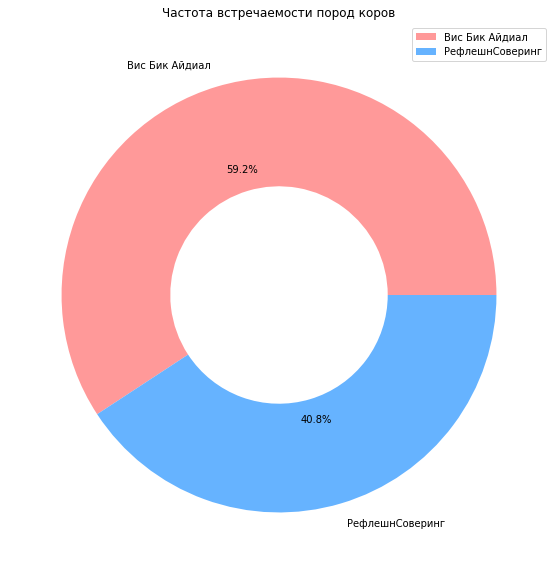

In [9]:
farm_main['breed'].value_counts().plot(
    kind='pie',
    figsize=(10, 10),
    autopct='%1.1f%%',
    title='Частота встречаемости пород коров',
    ylabel='',
    wedgeprops={'width': 0.5},
    colors=['#ff9999', '#66b3ff']);

plt.legend()
plt.show()

Порода 'Вис Бик Айдиал' встречается чаще, чем 'РефлешнСоверинг' - 59.2% против 40.8% соотвественно

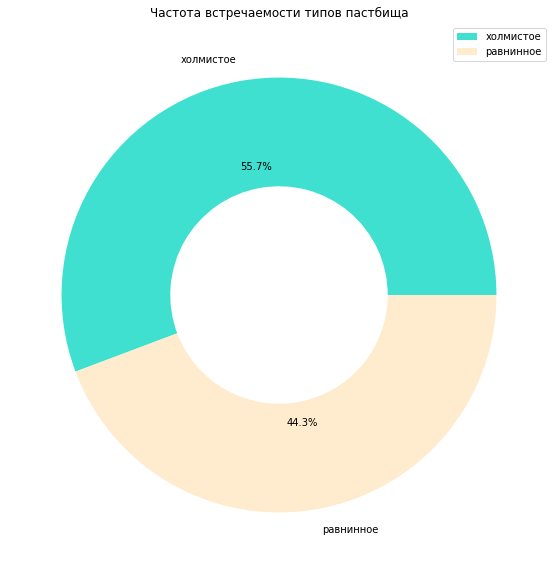

In [10]:
farm_main['pasture_type'].value_counts().plot(
    kind='pie',
    figsize=(10, 10),
    autopct='%1.1f%%',
    title='Частота встречаемости типов пастбища',
    ylabel='',
    wedgeprops={'width': 0.5},
    colors=['#40E0D0', '#FFEBCD']);

plt.legend()
plt.show()

Пастбище с типом 'Холмистое' встречается чаще, чем 'Равнинное' - 55.7% против 44.3% соотвественно

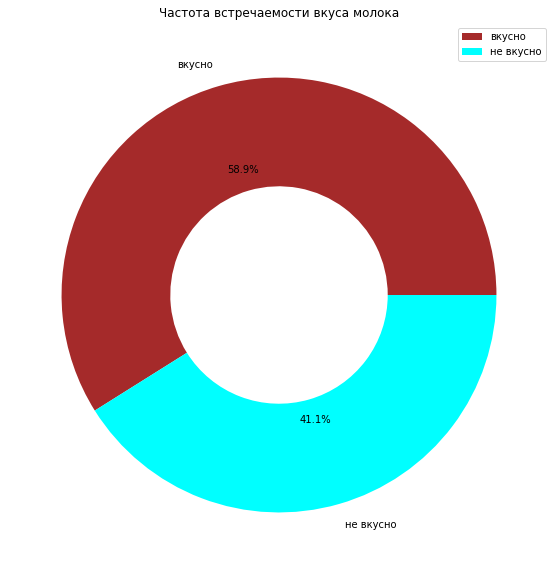

In [11]:
farm_main['taste_milk'].value_counts().plot(
    kind='pie',
    figsize=(10, 10),
    autopct='%1.1f%%',
    title='Частота встречаемости вкуса молока',
    ylabel='',
    wedgeprops={'width': 0.5},
    colors=['#A52A2A', '#00FFFF']);

plt.legend()
plt.show()

Чаще встречается вкусное молоко(58.9%), чем невкусное(41.1%)

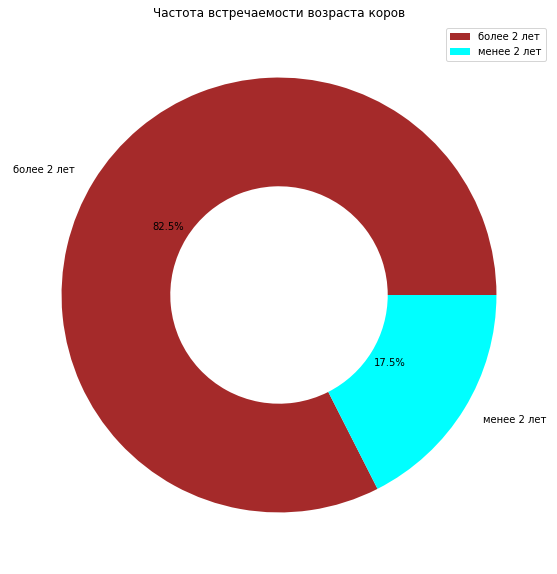

In [12]:
farm_main['age'].value_counts().plot(
    kind='pie',
    figsize=(10, 10),
    autopct='%1.1f%%',
    title='Частота встречаемости возраста коров',
    ylabel='',
    wedgeprops={'width': 0.5},
    colors=['#A52A2A', '#00FFFF']);

plt.legend()
plt.show()

У фермера почти все коровы старше двух лет - 82.5%, остальные 17.5% младше 

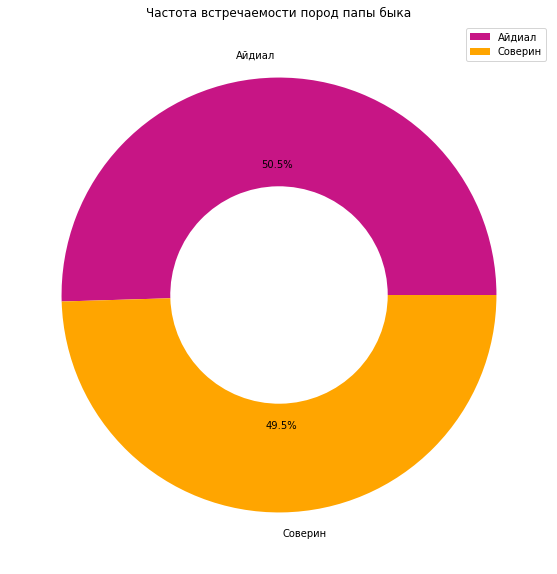

In [13]:
farm_main['breed_dad'].value_counts().plot(
    kind='pie',
    figsize=(10, 10),
    autopct='%1.1f%%',
    title='Частота встречаемости пород папы быка',
    ylabel='',
    wedgeprops={'width': 0.5},
    colors=['#C71585', '#FFA500']);

plt.legend()
plt.show()

Породы пап быков встречаются почти одинаково Айдиал - 50.5%, Соверин - 49.5%

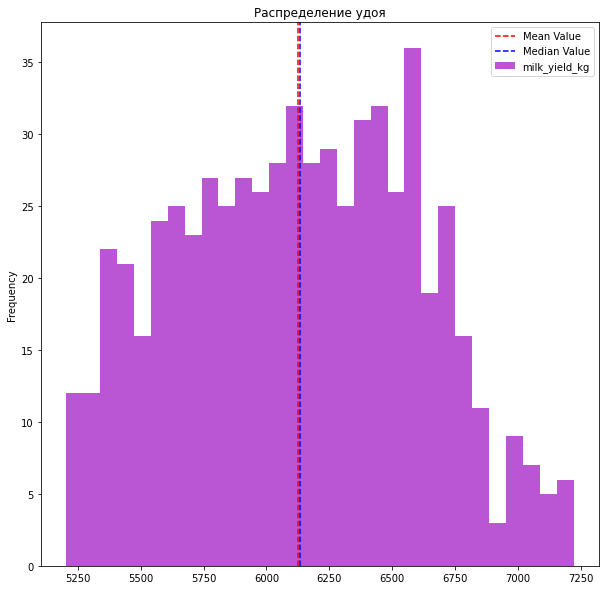

In [14]:
farm_main['milk_yield_kg'].plot(
    kind='hist',
    bins=30,
    title='Распределение удоя',
    xlabel='Удой, кг',
    ylabel='Количество коров',
    figsize=(10, 10),
    color='#BA55D3');

plt.axvline(x=farm_main['milk_yield_kg'].mean(), color='red', linestyle='--', label='Mean Value')
plt.axvline(x=farm_main['milk_yield_kg'].median(), color='blue', linestyle='--', label='Median Value')
plt.legend()
plt.show()

Удой молока у фермера варьируется примерно от 5200 до 7200, в среднем в год у него на ферме 6100-6150 кг молока в год, распределение выглядит нормальным

<div class="alert alert-warning">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>
    
<b>Некоторые замечания и рекомендации💡:</b> 

Верно. Здесь также по проекту нас просят прокомментировать, нормально ли распредлены количественные признаки.
        
</div> 

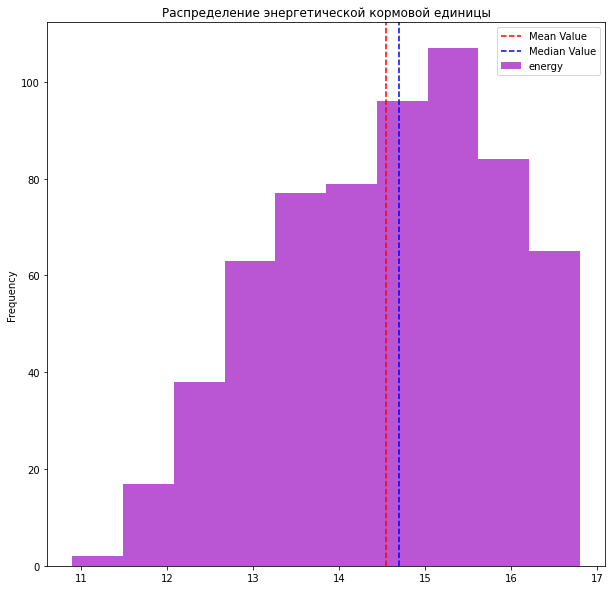

In [15]:
farm_main['energy'].plot(
    kind='hist',
    bins=10,
    title='Распределение энергетической кормовой единицы',
    xlabel='Энергетическая кормовая единица',
    ylabel='Количество коров',
    figsize=(10, 10),
    color='#BA55D3');

plt.axvline(x=farm_main['energy'].mean(), color='red', linestyle='--', label='Mean Value')
plt.axvline(x=farm_main['energy'].median(), color='blue', linestyle='--', label='Median Value')
plt.legend()
plt.show()

Показатель питательности корма коровы у фермера варьируется примерно от 11 до 17, в среднем от 14.5, распределение ассиметрично влево

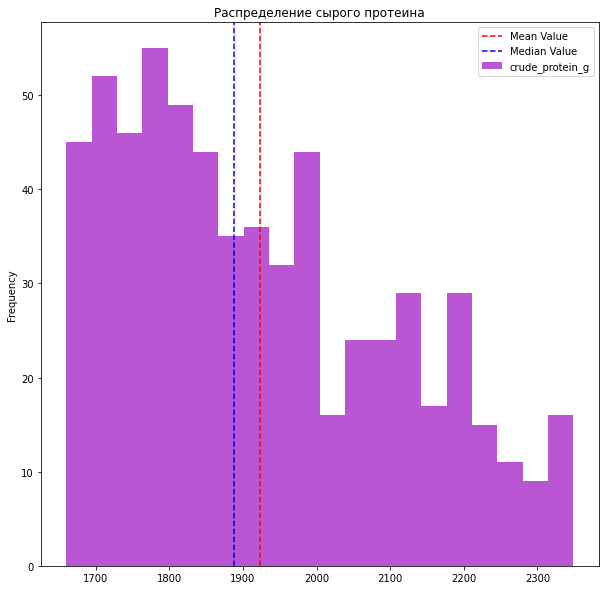

In [16]:
farm_main['crude_protein_g'].plot(
    kind='hist',
    bins=20,
    title='Распределение сырого протеина',
    xlabel='Сырой протеин, г',
    ylabel='Количество коров',
    figsize=(10, 10),
    color='#BA55D3');

plt.axvline(x=farm_main['crude_protein_g'].mean(), color='red', linestyle='--', label='Mean Value')
plt.axvline(x=farm_main['crude_protein_g'].median(), color='blue', linestyle='--', label='Median Value')
plt.legend()
plt.show()

Содержание сырого протеина в корме коровы у фермера варьируется примерно от 1650 до 2400 г., в среднем около 1900 г., , распределение ассиметрично вправо

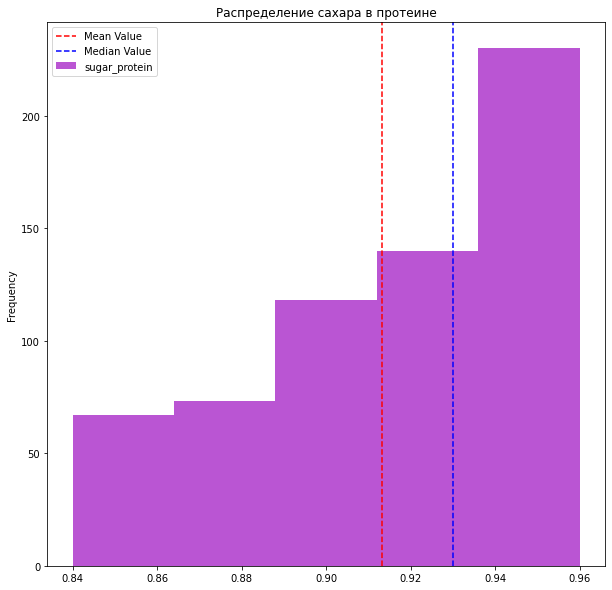

In [17]:
farm_main['sugar_protein'].plot(
    kind='hist',
    bins=5,
    title='Распределение сахара в протеине',
    xlabel='Сахар в протеине, г',
    ylabel='Количество коров',
    figsize=(10, 10),
    color='#BA55D3');


plt.axvline(x=farm_main['sugar_protein'].mean(), color='red', linestyle='--', label='Mean Value')
plt.axvline(x=farm_main['sugar_protein'].median(), color='blue', linestyle='--', label='Median Value')
plt.legend()
plt.show()

Отношение сахара к протеину в корме коровы у фермера варьируется примерно от 0.84 до 0.96, в среднем около 0.92, , распределение ассиметрично влево

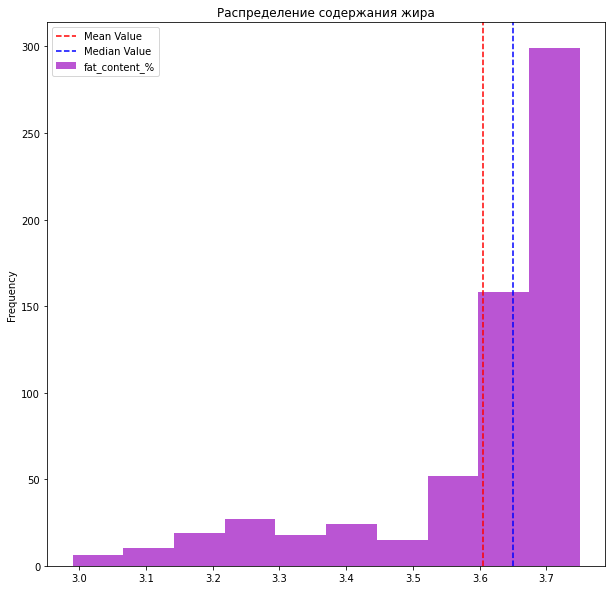

In [18]:
farm_main['fat_content_%'].plot(
    kind='hist',
    bins=10,
    title='Распределение содержания жира',
    xlabel='Содержание жира, %',
    ylabel='Количество коров',
    figsize=(10, 10),
    color='#BA55D3');

plt.axvline(x=farm_main['fat_content_%'].mean(), color='red', linestyle='--', label='Mean Value')
plt.axvline(x=farm_main['fat_content_%'].median(), color='blue', linestyle='--', label='Median Value')
plt.legend()
plt.show()

Содержание жиров в молоке коровы у фермера варьируется примерно от 3 до 3.7, в среднем около 3.6 - 3.65, , распределение ассиметрично влево, большинство значений после 3.6%. Выбросов, я думаю, тут нет, такая жирность для молока нормальная, просто так распределена

<div class="alert alert-warning">
<h2> Комментарий ревьюера  #2 <a class="tocSkip"> </h2>
    
<b>Некоторые замечания и рекомендации💡:</b> 

Здесь ощущение, что есть три распределения внутри данных. Видим три пика (если сделать больше бинов, увидим). Распределение сложно назвать нормальным. И с корреляцией Пирсона есть риск, что расчет будет неточным.
       
</div>



<div class="alert alert-warning">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>
    
<b>Некоторые замечания и рекомендации💡:</b> 

Здесь интересная история с распределением.
        
</div> 

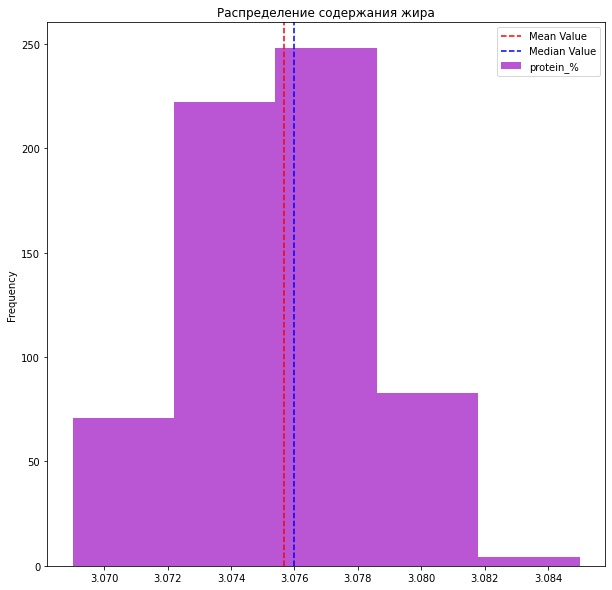

In [19]:
farm_main['protein_%'].plot(
    kind='hist',
    bins=5,
    title='Распределение содержания жира',
    xlabel='Содержание жира, %',
    ylabel='Количество коров',
    figsize=(10, 10),
    color='#BA55D3');

plt.axvline(x=farm_main['protein_%'].mean(), color='red', linestyle='--', label='Mean Value')
plt.axvline(x=farm_main['protein_%'].median(), color='blue', linestyle='--', label='Median Value')
plt.legend()
plt.show()

Содержание белков в молоке коровы у фермера варьируется примерно от 3.07 до 3.084, в среднем около 3.076, распределение нормальное

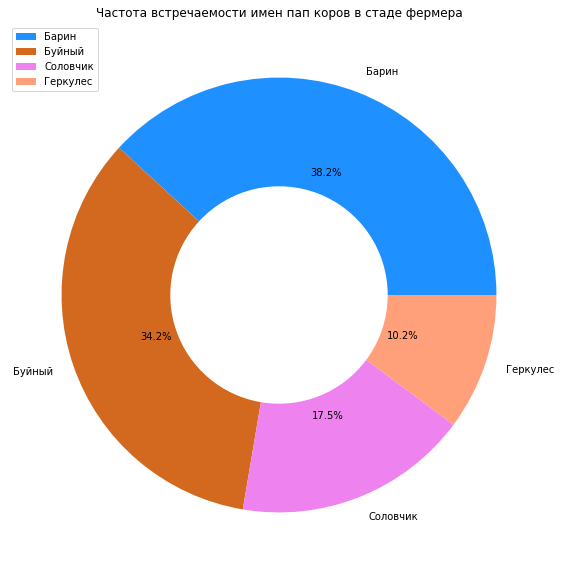

In [20]:
# анализ переменных второй таблицы
#print(farm_dad.head())

farm_dad['dads_name'].value_counts().plot(
    kind='pie',
    figsize=(10, 10),
    autopct='%1.1f%%',
    title='Частота встречаемости имен пап коров в стаде фермера',
    ylabel='',
    wedgeprops={'width': 0.5},
    colors=['#1E90FF', '#D2691E', '#EE82EE', '#FFA07A']);

plt.legend()
plt.show()

Чаще всего встречается имя Барин - 38.2%, реже всего Геркулес - 10.2%, также есть имена Буйный - 34.2% и Соловчик - 17.5%

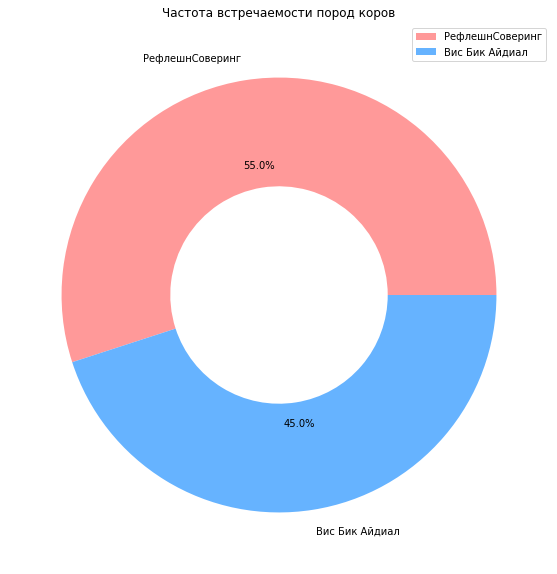

In [21]:
# анализ переменных третьей таблицы
cow_buy['breed'].value_counts().plot(
    kind='pie',
    figsize=(10, 10),
    autopct='%1.1f%%',
    title='Частота встречаемости пород коров',
    ylabel='',
    wedgeprops={'width': 0.5},
    colors=['#ff9999', '#66b3ff'],);

plt.legend()
plt.show()

Породы коров «ЭкоФермы» распределены равномерно, их всего две - 'РефлешнСоверинг' и 'Вис Бик Айдиал'

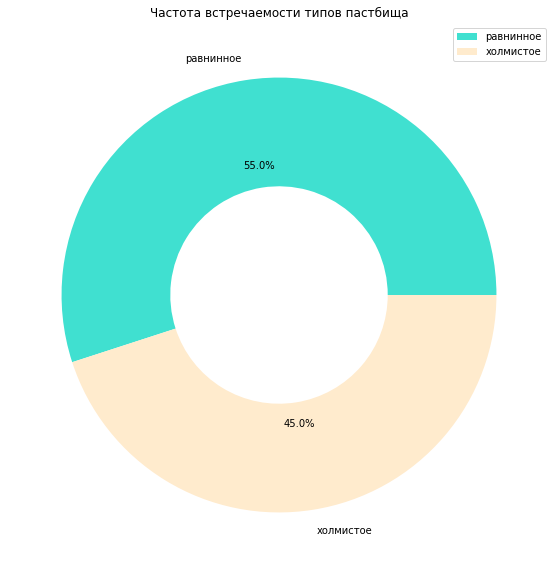

In [22]:
cow_buy['pasture_type'].value_counts().plot(
    kind='pie',
    figsize=(10, 10),
    autopct='%1.1f%%',
    title='Частота встречаемости типов пастбища',
    ylabel='',
    wedgeprops={'width': 0.5},
    colors=['#40E0D0', '#FFEBCD']);

plt.legend()
plt.show()

Типы пастбищ у «ЭкоФермы» распределены также равномерно

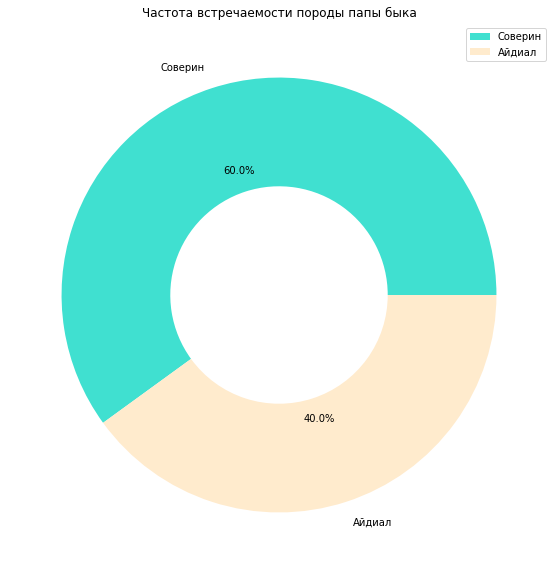

In [23]:
cow_buy['breed_dad'].value_counts().plot(
    kind='pie',
    figsize=(10, 10),
    autopct='%1.1f%%',
    title='Частота встречаемости породы папы быка',
    ylabel='',
    wedgeprops={'width': 0.5},
    colors=['#40E0D0', '#FFEBCD']);

plt.legend()
plt.show()

Породы пап коров «ЭкоФермы» две: 'Соверин' - 62.5% и 'Айдиал' - 37.5%

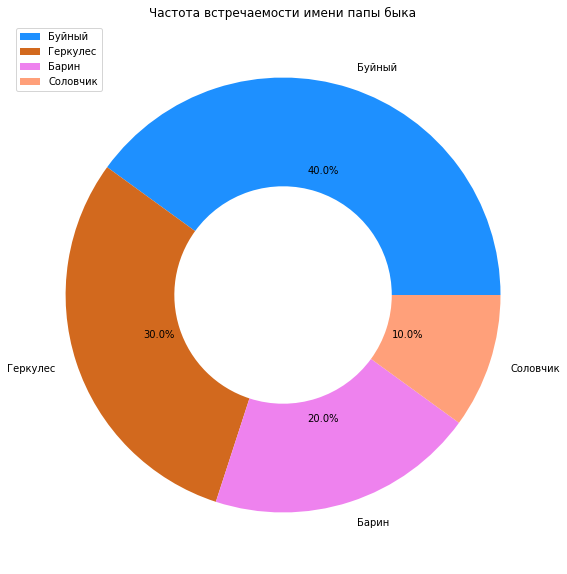

In [24]:
cow_buy['dads_name'].value_counts().plot(
    kind='pie',
    figsize=(10, 10),
    autopct='%1.1f%%',
    title='Частота встречаемости имени папы быка',
    ylabel='',
    wedgeprops={'width': 0.5},
    colors=['#1E90FF', '#D2691E', '#EE82EE', '#FFA07A']);

plt.legend()
plt.show()

Чаще всего встречается имя Буйный - 43.8%, реже всего Барин и Соловчик - 12.5%, также есть имя Геркулес - 31.2%

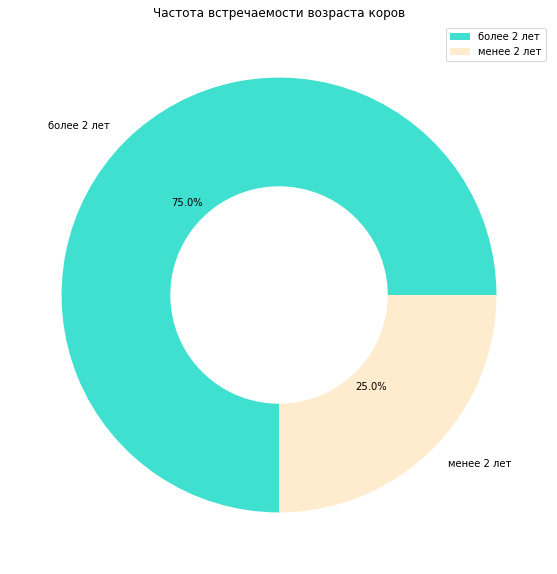

In [25]:
cow_buy['age'].value_counts().plot(
    kind='pie',
    figsize=(10, 10),
    autopct='%1.1f%%',
    title='Частота встречаемости возраста коров',
    ylabel='',
    wedgeprops={'width': 0.5},
    colors=['#40E0D0', '#FFEBCD']);

plt.legend()
plt.show()

У «ЭкоФермы» больше коров старше двух лет - 68.8%, остальные 31.2% младше

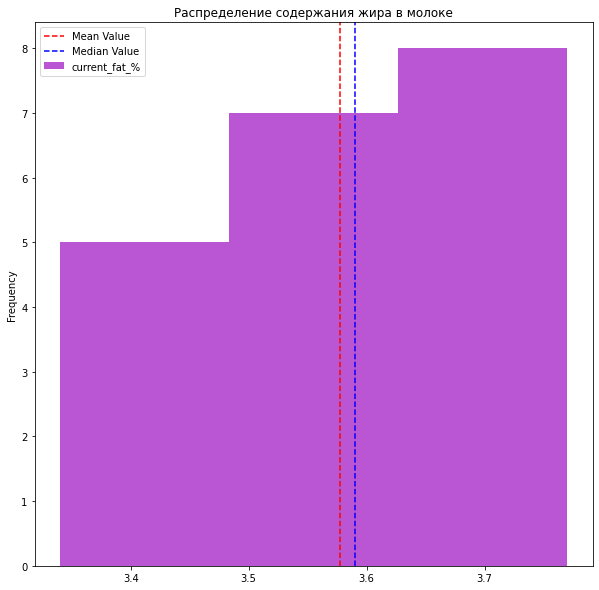

In [26]:
cow_buy['current_fat_%'].plot(
    kind='hist',
    bins=3,
    title='Распределение содержания жира в молоке',
    xlabel='Содержание жира, %',
    ylabel='Количество коров',
    figsize=(10, 10),
    color='#BA55D3');

plt.axvline(x=cow_buy['current_fat_%'].mean(), color='red', linestyle='--', label='Mean Value')
plt.axvline(x=cow_buy['current_fat_%'].median(), color='blue', linestyle='--', label='Median Value')
plt.legend()
plt.show()

Содержание жиров в молоке у «ЭкоФермы» варьируется примерно от 3.3 до 3.8, в среднем около 3.57, распределние нормальное

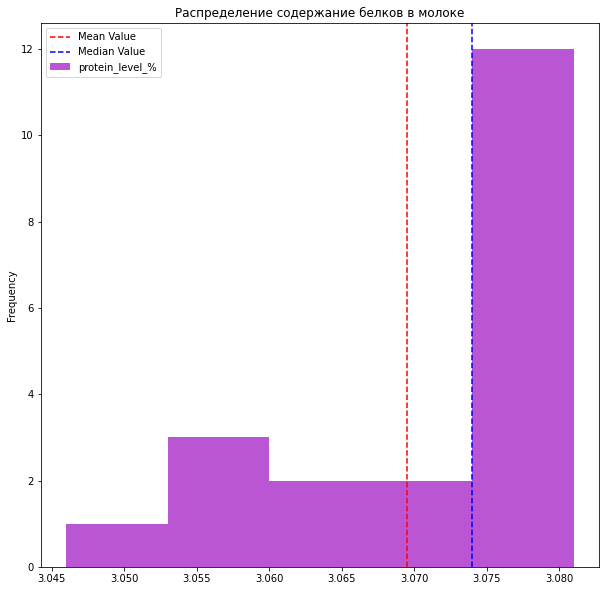

In [27]:
cow_buy['protein_level_%'].plot(
    kind='hist',
    bins=5,
    title='Распределение содержание белков в молоке',
    xlabel='Содержание жира, %',
    ylabel='Количество коров',
    figsize=(10, 10),
    color='#BA55D3');

plt.axvline(x=cow_buy['protein_level_%'].mean(), color='red', linestyle='--', label='Mean Value')
plt.axvline(x=cow_buy['protein_level_%'].median(), color='blue', linestyle='--', label='Median Value')
plt.legend()
plt.show()

Содержание белков в молоке у «ЭкоФермы» варьируется примерно от 3.046 до 3.081, в среднем около 3.068, распределение необычное, но разброс маленький и все эти значения нормальные для уровня протеина, поэтому можно так и оставить

Данные выглядят хорошо, выбросы удалены и данные подправлены, все это исправил в предобработке

Распределения отличные от нормального:
    
    В датасете с коровами фермера:
    
        -ЭКЕ
        -Сырой протеин
        -СПО
        -Жирность молока
        
    В датасете с коровами «ЭкоФермы»:
    
        -Уровень белков в молоке

Менять значения, чтобы у них было нормальное распределение не нужно, так как значения нормальные, без выбросов


 <div class="alert alert-block alert-danger">
<h2><s> Комментарий ревьюера <a class="tocSkip"></h2>
  
<b>На доработку🤔:</b>
 
Важно перечислить признаки, где наблюдаем распределение, отличное от нормального.

<div class="alert alert-info" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Комментарий ученика ✔️ </h2>
    
Исправил
</div>


<div class="alert alert-success"  style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Комментарий ревьюера #2 <a class="tocSkip"> </h2>    

👍 Верно.
</div>



## Корреляционный анализ 

In [28]:
print(farm_main[['energy', 'crude_protein_g', 'sugar_protein', 'fat_content_%', 'protein_%']].corr(method='spearman'))

                   energy  crude_protein_g  sugar_protein  fat_content_%  \
energy           1.000000         0.384747       0.741962       0.686973   
crude_protein_g  0.384747         1.000000       0.485890       0.392822   
sugar_protein    0.741962         0.485890       1.000000       0.701044   
fat_content_%    0.686973         0.392822       0.701044       1.000000   
protein_%       -0.013321         0.229051       0.109924       0.043125   

                 protein_%  
energy           -0.013321  
crude_protein_g   0.229051  
sugar_protein     0.109924  
fat_content_%     0.043125  
protein_%         1.000000  


<div class="alert alert-block alert-danger">
<h2><s> Комментарий ревьюера <a class="tocSkip"></h2>
  
<b>На доработку🤔:</b>
 
Если выше мы заметили, что не все признаки распределены нормально, то здесь нужно использовать корреляцию Спирмана или Phik или иные подходы, которые устойчивы к выбросам и ненормальному распределению. Корреляция Пирсона, которая здесь используется по умолчанию, нам не подходит.

`corr(method='spearman')` - так можно измерить корреляцию Спирмана.





</div>
  

<div class="alert alert-info" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Комментарий ученика ✔️ </h2>
    
Исправил
</div>


<div class="alert alert-success"  style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Комментарий ревьюера #2 <a class="tocSkip"> </h2>    

Ниже - да, выше - нет.
</div>



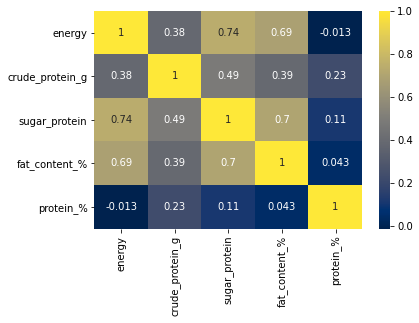

In [29]:
sns.heatmap(farm_main[['energy', 'crude_protein_g', 'sugar_protein', 'fat_content_%', 'protein_%']].corr(method='spearman'), annot=True, cmap='cividis')
plt.show()

Коэффициент корреляции равен 0.77


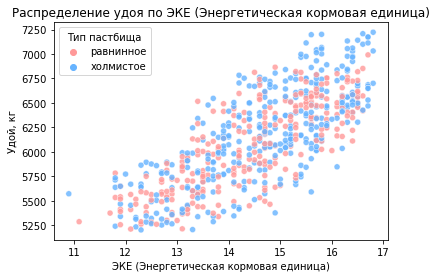

In [30]:
sns.scatterplot(
    x='energy',
    y='milk_yield_kg',
    hue='pasture_type',
    data=farm_main,
    palette=['#ff9999', '#66b3ff'],
    alpha=0.8)

print(f'Коэффициент корреляции равен', farm_main['milk_yield_kg'].corr(farm_main['energy']).round(2))
plt.title('Распределение удоя по ЭКЕ (Энергетическая кормовая единица)')
plt.xlabel('ЭКЕ (Энергетическая кормовая единица)')
plt.ylabel('Удой, кг')
plt.legend(title='Тип пастбища')
plt.show()

Исходя из коэффициента кореляции можно сказать, что между удоем и ЭКЕ сильная положительная связь, с увеличением ЭКЕ растет и удой

<div class="alert alert-warning">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>
    
<b>Некоторые замечания и рекомендации💡:</b> 

По ЭКЕ и удою у нас что-то среднее между линейной и квадратичной зависимостью. Если присмотреться, можно увидеть кривую, похожую на ветвь паработы - графика квадратичной функции. В проекте нам предлагается устранить здесь квадратичную зависимость (взять квадрат признака), чтобы модель могла корректно учитывать признак.
       
</div> 

Коэффициент корреляции равен 0.45


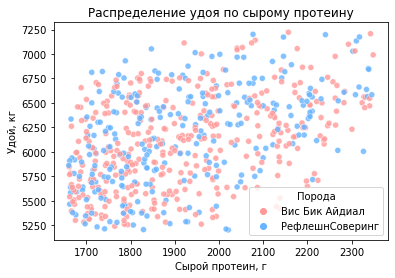

In [31]:
sns.scatterplot(
    x='crude_protein_g',
    y='milk_yield_kg',
    hue='breed',
    data=farm_main,
    palette=['#ff9999', '#66b3ff'],
    alpha=0.8)

print(f'Коэффициент корреляции равен', farm_main['milk_yield_kg'].corr(farm_main['crude_protein_g']).round(2))
plt.title('Распределение удоя по сырому протеину')
plt.xlabel('Сырой протеин, г')
plt.ylabel('Удой, кг')
plt.legend(title='Порода')
plt.show()

Исходя из коэффициента кореляции можно сказать, что между удоем и сырым протеином умеренная положительная связь, с увеличением сырого протеина растет и удой

<div class="alert alert-success"> 
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

👍 Согласен.
</div>  


Коэффициент корреляции равен 0.81


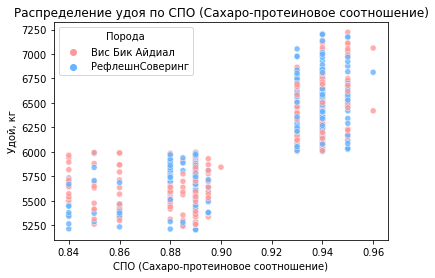

In [32]:
sns.scatterplot(
    x='sugar_protein',
    y='milk_yield_kg',
    hue='breed',
    data=farm_main,
    palette=['#ff9999', '#66b3ff'],
    alpha=0.8)

print(f'Коэффициент корреляции равен', farm_main['milk_yield_kg'].corr(farm_main['sugar_protein']).round(2))
plt.title('Распределение удоя по СПО (Сахаро-протеиновое соотношение)')
plt.xlabel('СПО (Сахаро-протеиновое соотношение)')
plt.ylabel('Удой, кг')
plt.legend(title='Порода')
plt.show()

Исходя из коэффициента кореляции можно сказать, что между удоем и СПО сильная положительная связь, но распределение разделенно на две группы

<div class="alert alert-success"> 
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

👍 Верно. Здесь нелинейная связь, видим два кластера.
</div>  


Коэффициент корреляции равен 0.6


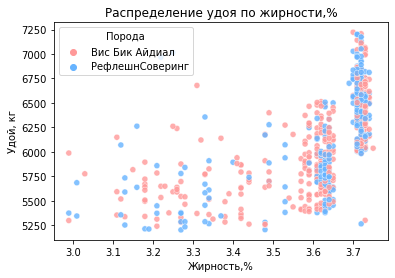

In [33]:
sns.scatterplot(
    x='fat_content_%',
    y='milk_yield_kg',
    hue='breed',
    data=farm_main,
    palette=['#ff9999', '#66b3ff'],
    alpha=0.8)

print(f'Коэффициент корреляции равен', farm_main['milk_yield_kg'].corr(farm_main['fat_content_%']).round(2))
plt.title('Распределение удоя по жирности,%')
plt.xlabel('Жирность,%')
plt.ylabel('Удой, кг')
plt.legend(title='Порода')
plt.show()

Исходя из коэффициента кореляции можно сказать, что между удоем и жирностью молока умеренная положительная связь, также можно выделить две основные группы с жирностью около 3.6%  и около 3.7%

Коэффициент корреляции равен 0.0


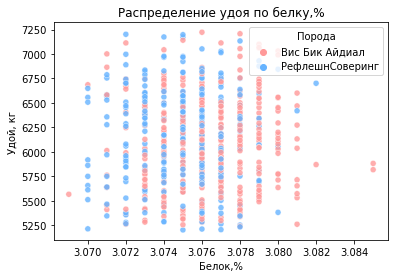

In [34]:
sns.scatterplot(
    x='protein_%',
    y='milk_yield_kg',
    hue='breed',
    data=farm_main,
    palette=['#ff9999', '#66b3ff'],
    alpha=0.8)

print(f'Коэффициент корреляции равен', farm_main['milk_yield_kg'].corr(farm_main['protein_%']).round(2))
plt.title('Распределение удоя по белку,%')
plt.xlabel('Белок,%')
plt.ylabel('Удой, кг')
plt.legend(title='Порода')
plt.show()

Коэффициент корреляции между удоем и белком равен нулю, взаимосвязи нет никакой

**Типы взаимосвязи признаков:**

    -Удой и ЭКЕ - сильная положительная связь
    -Удой и сырой протеин - умеренная положительная связь
    -Удой и СПО - сильная положительная связь
    -Удой и жирность молока - умеренная положительная связь
    -Удой и белок - связь отсутствует
    
Мультиколлениарности нет, для модели, думаю, можно исключить белок, также можно убрать вкус молока, т.к. его нет в датасете cow_buy

<div class="alert alert-success"> 
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

👍 Согласен, мультиколлинеарности нет.
    
***
    
По признакам обязательно нужно будет добавить комментарий ниже - что берем, что не берем в линейную модель.
</div>  


In [35]:
display(farm_main.sample(5))

,id,milk_yield_kg,energy,crude_protein_g,sugar_protein,breed,pasture_type,breed_dad,fat_content_%,protein_%,taste_milk,age
15,16,6518,15.6,1747,0.93,Вис Бик Айдиал,равнинное,Айдиал,3.73,3.076,вкусно,более 2 лет
355,357,5827,13.6,1718,0.89,Вис Бик Айдиал,холмистое,Соверин,3.34,3.075,вкусно,менее 2 лет
609,611,6480,16.4,2130,0.94,РефлешнСоверинг,холмистое,Соверин,3.71,3.074,вкусно,более 2 лет
584,586,5751,13.5,1684,0.88,РефлешнСоверинг,равнинное,Соверин,3.64,3.071,не вкусно,более 2 лет
84,86,6398,15.9,1750,0.93,Вис Бик Айдиал,равнинное,Айдиал,3.73,3.079,вкусно,более 2 лет


Для модели решил взять такие признаки:

    Категориальные:
        -Порода
        -Тип пастбища
        -Порода папы быка
        -Возраст коровы
    
    Количественные:
    
        -ЭКЕ
        -Сырой протеин
        -СПО

## Обучение модели линейной регрессии

<div class="alert alert-block alert-danger">
<h2><s> Комментарий ревьюера <a class="tocSkip"></h2>
  
<b>На доработку🤔:</b>
 
Жирность (и белок) в молоке - характеристики самого молока, а не питания коровы. Эти харакетристики зависят от питания, породы итд - и коррелируют с удоем, но не связаны с ним причинно-следственными связями и не влияют на него. Нам важно отобрать те признаки, которые влияют на таргет.
    
(здесь также логика в том, что с изменением питания у нас должны бы измениться и жирность молока. Однако мы не можем задним числом пересчитать ожидаемые параметры молока для стада фермера и для случая, если бы он кормил свое стадо так, как собирается кормить новых коров. Поэтому брать признаки корма не стоит).
    
Так как у нас неплохой набор признаков, которые определяют удой, то я бы не стал здесь в моделях использовать жирность и белок - эти признаки скорее будут вносить шум и провоцировать модель находить ложные зависимости.
    
Со вкусом молока та же история − это характеристика молока. Не берем.

Также понятно, что id - полностью случайный признак, его брать в модель не нужно.     
    
А вот все остальные признаки пригодятся. Должно получиться семь: три количественных, четыре категориальных.
 
</div>

<div class="alert alert-info" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Комментарий ученика ✔️ </h2>
    
Исправил, написал какие выбрал для модели выше
</div>

,id,milk_yield_kg,energy,crude_protein_g,sugar_protein,breed,pasture_type,breed_dad,fat_content_%,protein_%,taste_milk,age
332,334,5642,13.8,1692,0.880,РефлешнСоверинг,равнинное,Соверин,3.65,3.071,не вкусно,более 2 лет
58,60,6697,16.5,1769,0.930,РефлешнСоверинг,холмистое,Айдиал,3.71,3.077,не вкусно,более 2 лет
6,7,5910,13.2,1792,0.885,Вис Бик Айдиал,равнинное,Соверин,3.48,3.077,вкусно,более 2 лет
63,65,6559,16.3,2058,0.930,РефлешнСоверинг,холмистое,Айдиал,3.72,3.077,вкусно,более 2 лет
523,525,6975,15.5,1984,0.930,РефлешнСоверинг,холмистое,Айдиал,3.72,3.075,не вкусно,более 2 лет


R2 = 0.784
MAE = 164.242
MSE = 43887.015
RMSE = 209.492


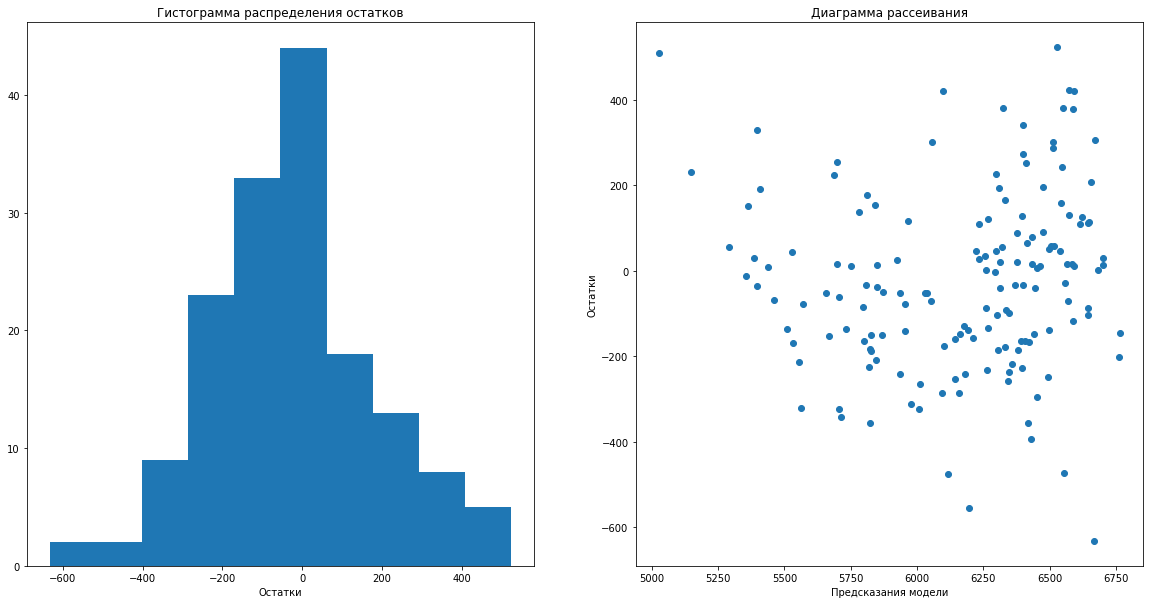

In [36]:
display(farm_main.sample(5))

RANDOM_STATE = 42

X = farm_main.drop('milk_yield_kg', axis=1)
y = farm_main['milk_yield_kg']

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    random_state=RANDOM_STATE
)

cat_col_names = ['breed', 'pasture_type', 'breed_dad', 'age']
num_col_names = ['energy', 'crude_protein_g', 'sugar_protein']

encoder = OneHotEncoder(drop='first', sparse=False)
X_train_ohe = encoder.fit_transform(X_train[cat_col_names])
X_test_ohe = encoder.transform(X_test[cat_col_names])

encoder_col_names = encoder.get_feature_names()

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train[num_col_names])
X_test_scaled = scaler.transform(X_test[num_col_names])

X_train_ohe = pd.DataFrame(X_train_ohe, columns=encoder_col_names)
X_test_ohe = pd.DataFrame(X_test_ohe, columns=encoder_col_names)

X_train_scaled = pd.DataFrame(X_train_scaled, columns=num_col_names)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=num_col_names)

X_train = pd.concat([X_train_ohe, X_train_scaled], axis=1)
X_test = pd.concat([X_test_ohe, X_test_scaled], axis=1)

model_lr = LinearRegression()
model_lr.fit(X_train, y_train)
predictions = model_lr.predict(X_test)

r2 = r2_score(y_test, predictions)
print(f'R2 = {r2:.3f}')
mae = mean_absolute_error(y_test, predictions)
print(f'MAE = {mae:.3f}')
mse = mean_squared_error(y_test, predictions)
print(f'MSE = {mse:.3f}')
rmse = np.sqrt(mse)
print(f'RMSE = {rmse:.3f}')

residuals = y_test - predictions
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 10))
axes[0].hist(residuals)
axes[0].set_title('Гистограмма распределения остатков')
axes[0].set_xlabel('Остатки')

axes[1].scatter(predictions, residuals)
axes[1].set_xlabel('Предсказания модели')
axes[1].set_ylabel('Остатки')
axes[1].set_title('Диаграмма рассеивания')
plt.show()

R2 или коэффициент детермиинации данной модели равен 0.784, в целом значение уже хорошее, нужно исправлять и добиваться результата получше, модель в среднем ошибается на 164 кг., остатки распределены нормально, разброс дисперсии непостоянный, виден сдвиг остатков на вторую половину после 6000 кг. удоя

 <div class="alert alert-warning">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>
    
<b>Некоторые замечания и рекомендации💡:</b> 
 
`остатки распределены нормально, разброс дисперсии непостоянный, виден сдвиг остатков на вторую половину` - здесь важно переформулировать. Не совсем понимаю, где у нас половины, какие половины имеются ввиду?
    
***
    
`0.784, в целом значение не очень хорошее` - на самом деле, уже достаточно хорошее. Модель предсказывает сильно лучше, чем если бы мы предсказывали всегда средним. Как увидим дальше, качество будет расти, но всего на несколько процентров.
 

<div class="alert alert-info" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Комментарий ученика ✔️ </h2>
    
Уточнил, исправил в выводе, что значение хорошее
</div>

<div class="alert alert-warning">
<h2> Комментарий ревьюера  #2 <a class="tocSkip"> </h2>
    
<b>Некоторые замечания и рекомендации💡:</b> 

Хм, а у нас и по входным данным было такое смещение вправо от 6000 кг. Просто по факту у нас больше коров, которые дают удой выше 6000. Это не смещение. Это природа данных.
    
Точнее можно сказать, что дисперсия ошибо повышается для коров, чей удой выше 6000.
    
       
</div>

In [37]:
farm_main.loc[farm_main['sugar_protein'] >= 0.92, 'sugar_protein'] = 1
farm_main.loc[farm_main['sugar_protein'] < 0.92, 'sugar_protein'] = 0
farm_main['energy_squared'] = farm_main['energy'] ** 2

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>
 
👍  Точно  по порогу.
</div>  

<div class="alert alert-warning">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>
    
<b>Некоторые замечания и рекомендации💡:</b> 

Рекомендую во всех случаях, когда меняем содержание колонки, менять и название колонки. А лучше создавать новую. 
    
`farm_main.loc[farm_main['sugar_protein'] >= 0.92, 'sugar_protein'] = 1`
    
Ниже по коду не видно, мы используем изначальный признак или модифицированный, так как все сохранили в ту же переменную.
        
</div> 

Для второй модели были взяты такие признаки:

    Категориальные:
        -Порода
        -Тип пастбища
        -Порода папы быка
        -Возраст коровы
        -СПО
    
    Количественные:
    
        -ЭКЕ в квадрате
        -Сырой протеин
        
ЭКЕ был возведен в квадрат и СПО преобразован в категориальный бинарный признак

,id,milk_yield_kg,energy,crude_protein_g,sugar_protein,breed,pasture_type,breed_dad,fat_content_%,protein_%,taste_milk,age,energy_squared
246,248,6563,15.6,1985,1.0,Вис Бик Айдиал,равнинное,Соверин,3.72,3.073,не вкусно,более 2 лет,243.36
150,152,5894,14.8,2097,0.0,Вис Бик Айдиал,холмистое,Соверин,3.59,3.079,вкусно,более 2 лет,219.04
388,390,6331,15.9,1846,1.0,РефлешнСоверинг,равнинное,Соверин,3.72,3.074,вкусно,более 2 лет,252.81
574,576,6013,13.4,1900,1.0,Вис Бик Айдиал,равнинное,Айдиал,3.64,3.078,не вкусно,более 2 лет,179.56
607,609,6405,15.6,1787,1.0,Вис Бик Айдиал,холмистое,Соверин,3.73,3.077,не вкусно,более 2 лет,243.36


R2 = 0.818
MAE = 164.242
MSE = 43887.015
RMSE = 192.434


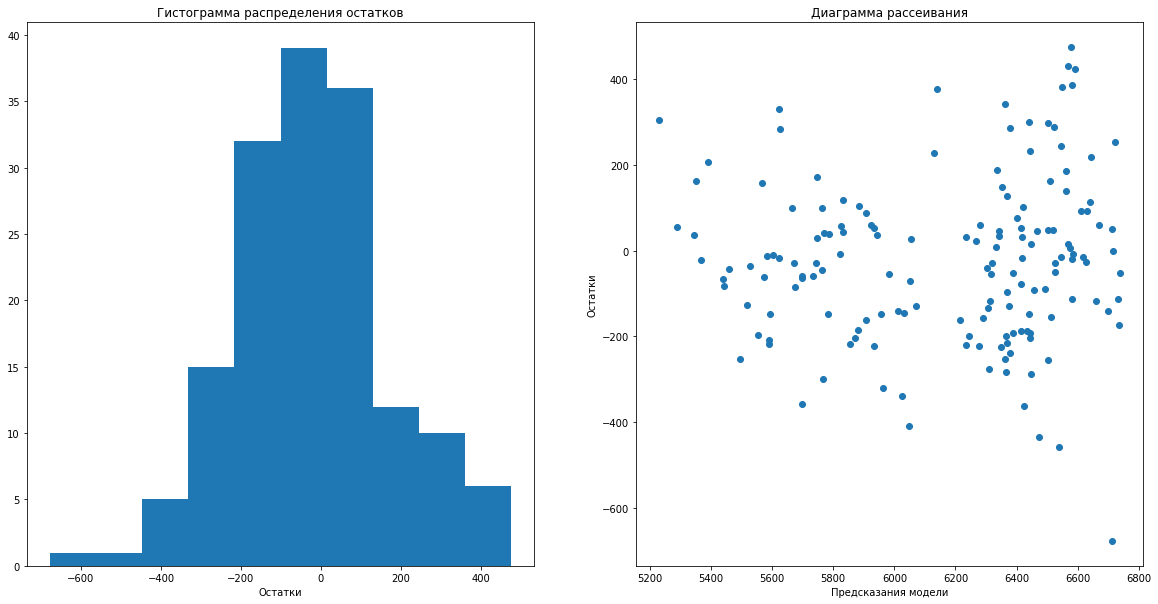

In [38]:
display(farm_main.sample(5))

X = farm_main.drop('milk_yield_kg', axis=1)
y = farm_main['milk_yield_kg']

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    random_state=RANDOM_STATE
)

cat_col_names = ['breed', 'pasture_type', 'breed_dad', 'age', 'sugar_protein']
num_col_names = ['crude_protein_g', 'energy_squared']


encoder = OneHotEncoder(drop='first', sparse=False)

X_train_ohe = encoder.fit_transform(X_train[cat_col_names])
X_test_ohe = encoder.transform(X_test[cat_col_names])
encoder_col_names = encoder.get_feature_names()

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train[num_col_names])
X_test_scaled = scaler.transform(X_test[num_col_names])


X_train_ohe = pd.DataFrame(X_train_ohe, columns=encoder_col_names)
X_test_ohe = pd.DataFrame(X_test_ohe, columns=encoder_col_names)

X_train_scaled = pd.DataFrame(X_train_scaled, columns=num_col_names)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=num_col_names)

X_train = pd.concat([X_train_ohe, X_train_scaled], axis=1)
X_test = pd.concat([X_test_ohe, X_test_scaled], axis=1)

model_lr2 = LinearRegression()
model_lr2.fit(X_train, y_train)

predictions_model2 = model_lr2.predict(X_test)

r2_model2 = r2_score(y_test, predictions_model2)
print(f'R2 = {r2_model2:.3f}')
mae_model2 = mean_absolute_error(y_test, predictions_model2)
print(f'MAE = {mae:.3f}')
mse_model2 = mean_squared_error(y_test, predictions_model2)
print(f'MSE = {mse:.3f}')
rmse_model2 = np.sqrt(mse_model2)
print(f'RMSE = {rmse_model2:.3f}')

residuals_model2 = y_test - predictions_model2
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 10))
axes[0].hist(residuals_model2)
axes[0].set_title('Гистограмма распределения остатков')
axes[0].set_xlabel('Остатки')

axes[1].scatter(predictions_model2, residuals_model2)
axes[1].set_xlabel('Предсказания модели')
axes[1].set_ylabel('Остатки')
axes[1].set_title('Диаграмма рассеивания')
plt.show()


 <div class="alert alert-block alert-danger">
<h2><s> Комментарий ревьюера <a class="tocSkip"></h2>
  
<b>На доработку🤔:</b>
 
Важно уточнить по признакам. Кажется, здесь забыли использовать ЭКЕ в квадрате.


<div class="alert alert-info" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Комментарий ученика ✔️ </h2>
    
Добавил перед использованеим модели, какие в ней будут признаки
</div>

R2 у второй модели уже лучше и равен 0.818, уже лучше, модель также в среднем ошибается на 164 кг., остатки распределены нормально, разброс дисперсии тоже выглядит лучше, но также непостоянны

In [39]:
farm_main = pd.merge(farm_main, farm_dad, on='id')
display(farm_main.sample(5))

,id,milk_yield_kg,energy,crude_protein_g,sugar_protein,breed,pasture_type,breed_dad,fat_content_%,protein_%,taste_milk,age,energy_squared,dads_name
297,299,6558,14.6,2331,1.0,Вис Бик Айдиал,равнинное,Айдиал,3.74,3.080,вкусно,более 2 лет,213.16,Буйный
449,451,6030,13.8,1801,1.0,Вис Бик Айдиал,равнинное,Айдиал,3.61,3.080,не вкусно,более 2 лет,190.44,Буйный
115,117,5442,13.4,1742,0.0,Вис Бик Айдиал,равнинное,Соверин,3.58,3.074,не вкусно,менее 2 лет,179.56,Барин
422,424,6991,16.7,2349,1.0,Вис Бик Айдиал,равнинное,Айдиал,3.73,3.080,не вкусно,более 2 лет,278.89,Геркулес
330,332,6509,15.2,1814,1.0,РефлешнСоверинг,равнинное,Айдиал,3.72,3.072,вкусно,более 2 лет,231.04,Буйный


Для третьей модели были взяты такие признаки:

    Категориальные:
        -Порода
        -Тип пастбища
        -Порода папы быка
        -Возраст коровы
        -СПО
        -Имя папы коровы
    
    Количественные:
    
        -ЭКЕ в квадрате
        -Сырой протеин
        
Был добавлен новый категориальный признак "Имя папы коровы"

R2 = 0.825
MAE = 146.163
MSE = 35673.890
RMSE = 188.875


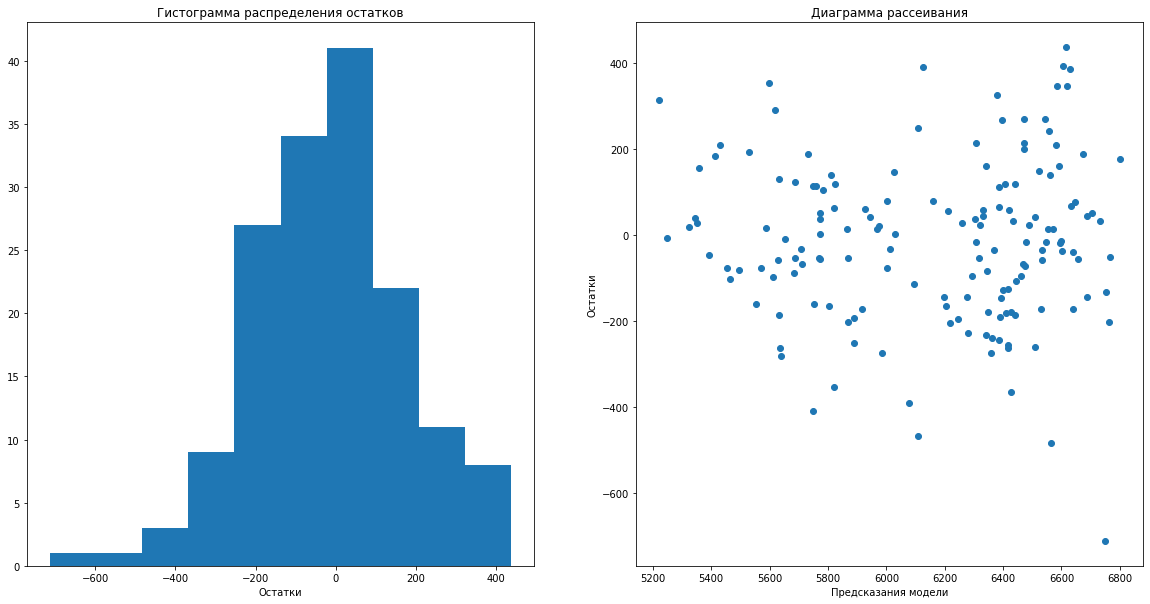

In [40]:
X = farm_main.drop('milk_yield_kg', axis=1)
y = farm_main['milk_yield_kg']

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    random_state=RANDOM_STATE
)

cat_col_names = ['breed', 'pasture_type', 'breed_dad', 'dads_name', 'age', 'sugar_protein']
num_col_names = ['energy_squared', 'crude_protein_g']

encoder = OneHotEncoder(drop='first', sparse=False)
X_train_ohe = encoder.fit_transform(X_train[cat_col_names])
X_test_ohe = encoder.transform(X_test[cat_col_names])
encoder_col_names = encoder.get_feature_names()

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train[num_col_names])
X_test_scaled = scaler.transform(X_test[num_col_names])

X_train_ohe = pd.DataFrame(X_train_ohe, columns=encoder_col_names)
X_test_ohe = pd.DataFrame(X_test_ohe, columns=encoder_col_names)

X_train_scaled = pd.DataFrame(X_train_scaled, columns=num_col_names)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=num_col_names)

X_train = pd.concat([X_train_ohe, X_train_scaled], axis=1)
X_test = pd.concat([X_test_ohe, X_test_scaled], axis=1)


model_lr3 = LinearRegression()
model_lr3.fit(X_train, y_train)

predictions_model3 = model_lr3.predict(X_test)

r2_model3 = r2_score(y_test, predictions_model3)
print(f'R2 = {r2_model3:.3f}')
mae_model3 = mean_absolute_error(y_test, predictions_model3)
print(f'MAE = {mae_model3:.3f}')
mse_model3 = mean_squared_error(y_test, predictions_model3)
print(f'MSE = {mse_model3:.3f}')
rmse_model3 = np.sqrt(mse_model3)
print(f'RMSE = {rmse_model3:.3f}')


residuals_model3 = y_test - predictions_model3
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 10))
axes[0].hist(residuals_model3)
axes[0].set_title('Гистограмма распределения остатков')
axes[0].set_xlabel('Остатки')

axes[1].scatter(predictions_model3, residuals_model3)
axes[1].set_xlabel('Предсказания модели')
axes[1].set_ylabel('Остатки')
axes[1].set_title('Диаграмма рассеивания')
plt.show()

	 
<div class="alert alert-warning">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>
    
<b>Некоторые замечания и рекомендации💡:</b> 

Также уточняем по ЭКЕ в квадрате.
        
</div> 

R2 у третьей модели лучше чем у предущих и равен 0.825, результат не идеален, но увереннее, модель в среднем ошибается на 146 кг., остатки распределены нормально, разброс дисперсии уже выглядит почти как постоянный

<div class="alert alert-success"> 
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

👍 Согласен
</div>  

Метрики для первой модели:
R2 Score: 0.784
Mean Absolute Error (MAE): 164.242
Mean Squared Error (MSE): 43887.015
Root Mean Squared Error (RMSE): 209.492


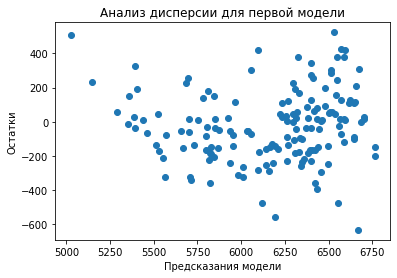

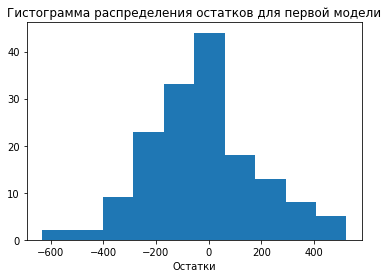


Метрики для второй модели:
R2 Score: 0.818
Mean Absolute Error (MAE): 149.040
Mean Squared Error (MSE): 37030.911
Root Mean Squared Error (RMSE): 192.434


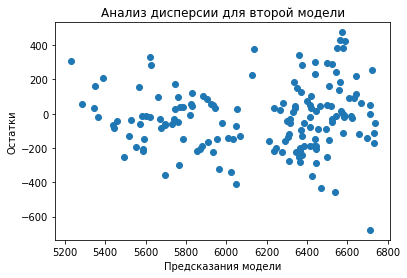

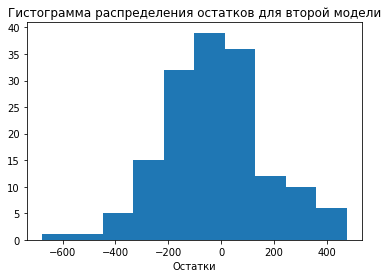


Метрики для третьей модели:
R2 Score: 0.825
Mean Absolute Error (MAE): 146.163
Mean Squared Error (MSE): 35673.890
Root Mean Squared Error (RMSE): 188.875


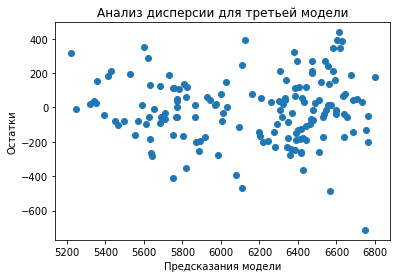

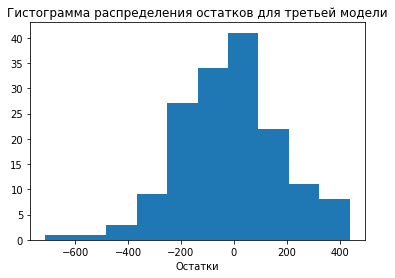

In [41]:
def print_model_metrics(model_number, y_test, predictions, residuals):
    r2_model = r2_score(y_test, predictions)
    mae_model = mean_absolute_error(y_test, predictions)
    mse_model = mean_squared_error(y_test, predictions)
    rmse_model = np.sqrt(mse_model)
    
    print(f'Метрики для {model_number} модели:')
    print(f'R2 Score: {r2_model:.3f}')
    print(f'Mean Absolute Error (MAE): {mae_model:.3f}')
    print(f'Mean Squared Error (MSE): {mse_model:.3f}')
    print(f'Root Mean Squared Error (RMSE): {rmse_model:.3f}')
    
    plt.scatter(predictions, residuals)
    plt.xlabel('Предсказания модели')
    plt.ylabel('Остатки')
    plt.title(f'Анализ дисперсии для {model_number} модели')
    plt.show()
    
    plt.hist(residuals)
    plt.xlabel('Остатки')
    plt.title(f'Гистограмма распределения остатков для {model_number} модели')
    plt.show()
    print()
    
print_model_metrics('первой', y_test, predictions, residuals)
print_model_metrics('второй', y_test, predictions_model2, residuals_model2)
print_model_metrics('третьей', y_test, predictions_model3, residuals_model3)

In [42]:
print('Доверительный интервал равен', st.norm.interval(0.95, 
                                                       loc=np.mean(predictions_model3),  
                                                       scale=st.sem(predictions_model3)
                                                      )
     )

Доверительный интервал равен (6092.340075854288, 6221.3750700583805)


<div class="alert alert-success"> 
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

👍 Отлично.
</div>  

    Исходя из метрик R2, MAE, MSE и RMSE можно сделать вывод что третья модель вышла наиболее удачной и точной относительно двух прошлых, в целом показала хорошие результаты в предсказании удельного веса молока коров. Метрики модели указывают на достаточно высокую точность поэтому модель будет полезна для прогнозирования удоя молока в год.
    
    Доверительный интервал равен 6092 - 6221

In [43]:
cow_buy['crude_protein_g'] = farm_main['crude_protein_g'].mean()*1.05
cow_buy['energy'] = farm_main['energy'].mean()*1.05
cow_buy['sugar_protein'] = farm_main['sugar_protein'].mean()*1.05
cow_buy.loc[cow_buy['sugar_protein'] >= 0.92, 'sugar_protein'] = 1
cow_buy.loc[cow_buy['sugar_protein'] < 0.92, 'sugar_protein'] = 0
cow_buy['energy_squared'] = farm_main['energy_squared'].mean()*1.05
display(cow_buy.sample())
display(farm_main.sample())

,breed,pasture_type,breed_dad,dads_name,current_fat_%,protein_level_%,age,crude_protein_g,energy,sugar_protein,energy_squared
15,РефлешнСоверинг,холмистое,Айдиал,Буйный,3.4,3.065,более 2 лет,2019.947532,15.276162,0.0,224.025225


,id,milk_yield_kg,energy,crude_protein_g,sugar_protein,breed,pasture_type,breed_dad,fat_content_%,protein_%,taste_milk,age,energy_squared,dads_name
553,555,5686,14.7,1712,0.0,РефлешнСоверинг,холмистое,Айдиал,3.01,3.074,вкусно,более 2 лет,216.09,Буйный


<div class="alert alert-success"> 
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

👍 Верно по признакам.
</div>  

In [44]:
cat_col_names = ['breed', 'pasture_type', 'breed_dad', 'dads_name', 'age', 'sugar_protein']
num_col_names = ['energy_squared', 'crude_protein_g']


cow_buy_ohe = encoder.transform(cow_buy[cat_col_names])
encoder_col_names = encoder.get_feature_names()


cow_buy_scaled = scaler.transform(cow_buy[num_col_names])
X_test_ohe = pd.DataFrame(cow_buy_ohe, columns=encoder_col_names)
X_test_scaled = pd.DataFrame(cow_buy_scaled, columns=num_col_names)

X_test = pd.concat([X_test_ohe, X_test_scaled], axis=1)


predictions_milk_yield_kg = model_lr3.predict(X_test)
predictions_milk_yield_kg

array([6215.76311421, 5984.55484576, 5889.84359272, 6198.93319394,
       6147.98988373, 6031.22403499, 6215.76311421, 6177.10355451,
       5889.84359272, 6006.38448519, 5950.55167715, 6223.77274374,
       6215.76311421, 5733.3185597 , 5889.84359272, 6198.93319394,
       5950.55167715, 6031.22403499, 6177.10355451, 6147.98988373])

 <div class="alert alert-block alert-danger">
<h2><s> Комментарий ревьюера <a class="tocSkip"></h2>
  
<b>На доработку🤔:</b>
 
Здесь важно перепроверить, те ли признаки и в том ли порядке мы используем при предсказании и при обучении модели. Важно, чтобы все совпадало.
    
***
    
Здесь также мы при предсказании должны использовать скелер и энкодер, обученные на тренировочной выборке до обучения модели. К моменту предсказания у нас уже есть готовые и обученные скелер и энкодер. Здесь никаких fit делать не нужно, только transform и predict.

<div class="alert alert-info" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Комментарий ученика ✔️ </h2>
    
Понял, все исправил, вообще с этими скелерами и энкодерами запутался и где надо фит писать, щас вроде все понятно, что это при обучении только
</div>

<div class="alert alert-warning">
<h2> Комментарий ревьюера  #2 <a class="tocSkip"> </h2>
    
<b>Некоторые замечания и рекомендации💡:</b> 

Обучаемся только на тренировочной выборке. Все fit только с ней.
       
</div>

Прогноз удоя коров получен, в таблицу будет добавлен в конце

<div class="alert alert-warning">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>
    
<b>Некоторые замечания и рекомендации💡:</b> 

В выводе можно уточнить, сколько коров соответствуют требованиям фермера к удою.
        
</div> 

## Обучение модели логистической регрессии

In [45]:
farm_main.loc[farm_main['taste_milk'] == 'вкусно', 'taste_milk'] = 1
farm_main.loc[farm_main['taste_milk'] == 'не вкусно', 'taste_milk'] = 0
farm_main['taste_milk'] = farm_main['taste_milk'].astype(float)

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

👍 Отлично 
</div> 


In [46]:
farm_main.head()

,id,milk_yield_kg,energy,crude_protein_g,sugar_protein,breed,pasture_type,breed_dad,fat_content_%,protein_%,taste_milk,age,energy_squared,dads_name
0,1,5863,14.2,1743,0.0,Вис Бик Айдиал,равнинное,Айдиал,3.58,3.076,1.0,более 2 лет,201.64,Буйный
1,2,5529,12.8,2138,0.0,Вис Бик Айдиал,равнинное,Соверин,3.54,3.079,1.0,менее 2 лет,163.84,Соловчик
2,3,5810,14.0,1854,0.0,РефлешнСоверинг,холмистое,Соверин,3.59,3.074,0.0,более 2 лет,196.00,Барин
3,4,5895,12.4,2012,0.0,РефлешнСоверинг,холмистое,Айдиал,3.40,3.075,0.0,более 2 лет,153.76,Буйный
4,5,5302,12.8,1675,0.0,Вис Бик Айдиал,равнинное,Соверин,3.73,3.073,1.0,менее 2 лет,163.84,Барин


In [47]:
RANDOM_STATE = 42

X = farm_main.drop('taste_milk', axis=1)
y = farm_main['taste_milk']

X_train, X_test, y_train, y_test = train_test_split(
    X, 
    y, 
    random_state=RANDOM_STATE)

cat_col_names = ['breed', 'pasture_type', 'breed_dad', 'dads_name', 'age', 'sugar_protein']
num_col_names = ['energy_squared', 'crude_protein_g', 'fat_content_%', 'protein_%']

encoder = OneHotEncoder(drop='first', sparse=False)
X_train_ohe = encoder.fit_transform(X_train[cat_col_names])
X_test_ohe = encoder.transform(X_test[cat_col_names])

encoder_col_names = encoder.get_feature_names()

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train[num_col_names])
X_test_scaled = scaler.transform(X_test[num_col_names])

X_train_ohe = pd.DataFrame(X_train_ohe, columns=encoder_col_names)
X_test_ohe = pd.DataFrame(X_test_ohe, columns=encoder_col_names)

X_train_scaled = pd.DataFrame(X_train_scaled, columns=num_col_names)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=num_col_names)

X_train = pd.concat([X_train_ohe, X_train_scaled], axis=1)
X_test = pd.concat([X_test_ohe, X_test_scaled], axis=1)

clf = LogisticRegression()
clf = clf.fit(X_train, y_train) 
y_pred = clf.predict(X_test)

In [48]:
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_pred, y_test)
precision = precision_score(y_pred,y_test)

print(f'Accuracy: {accuracy:.3f}')
print(f'Recall: {recall:.3f}')
print(f'Precision: {precision:.3f}')

Accuracy: 0.631
Recall: 0.623
Precision: 0.864


<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

👍 Здесь все замечательно по коду.
</div> 


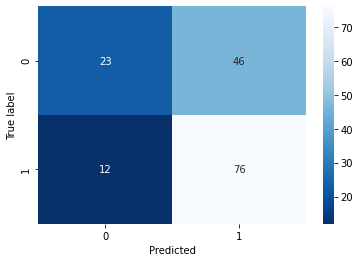

In [49]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues_r')
plt.ylabel('True label')
plt.xlabel('Predicted');

Так как для нас главная задача, чтобы молоко было обязательно вкусным, то есть результат был True Positive, нам важна метрика Precision, чтобы исключить ошибки первого рода, в целом эта метрика и так достаточно высокая

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

👍 Точно так.
</div> 


In [50]:
threshold = 0.5

while True:
    threshold+=0.001
    y_pred = (clf.predict_proba(X_test)[:,1] >= threshold).astype('bool')
    if precision_score(y_test, y_pred) == 1:
        break
        
print(threshold)

0.8060000000000003


In [51]:
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)

print(f'Accuracy: {accuracy:.3f}')
print(f'Recall: {recall:.3f}')
print(f'Precision: {precision:.3f}')

Accuracy: 0.490
Recall: 0.091
Precision: 1.000


<div class="alert alert-block alert-danger">
<h2><s> Комментарий ревьюера <a class="tocSkip"></h2>
  
<b>На доработку🤔:</b>

Важно посчитать порог в цикле в явном виде, чтобы понимать, что мы выбрали наиболее оптимальный.

```
probabilities_one_valid = clf.predict_proba(X_test)[:,1]
    
for i in np.arange(0.5, 0.9, 0.02).round(2):
    y_pred = probabilities_one_valid > i
    print('порог: ', i, 'precision: ', precision_score(y_test, y_pred))
```       

Либо вывести отсортированный список вероятностей, тогда по первой ошибкам увидим, какой порог будет оптимальным.

```

y_proba = model_lr_1.predict_proba(X_test4)[:,1]

data = pd.DataFrame(zip(y_test, y_proba),
             columns = ['y_valid', 'y_proba']).sort_values(by='y_proba',ascending=False)

print(data.head(20)) 

```

Либо сразу автоматически вывести то, что нам нужно:

```

porog = 0.5
while True:
    porog+=0.001
    pred = (logreg.predict_proba(X_test)[:,1] >= porog).astype('bool')
    if precision_score(y_test, pred) == 1:
        break
porog

```

</div>

<div class="alert alert-info" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Комментарий ученика ✔️ </h2>
    
Исправил
</div>

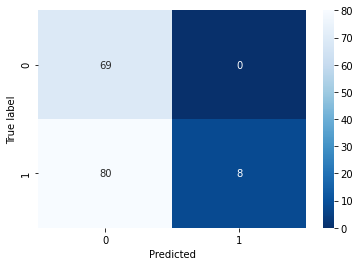

In [52]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues_r')
plt.ylabel('True label')
plt.xlabel('Predicted');

После исправления порога ошибок первого рода больше нет

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>
 
👍  Ок 
</div>    
 

In [53]:
cow_buy = cow_buy.rename(columns={'protein_level_%': 'protein_%', 
                                  'current_fat_%': 'fat_content_%'})

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>
 
👍 Это действие я бы сделал в самом начале проекта, на этапе предобработки. 
</div>    
 

In [54]:
cat_col_names = ['breed', 'pasture_type', 'breed_dad', 'dads_name', 'age', 'sugar_protein']
num_col_names = ['energy_squared', 'crude_protein_g', 'fat_content_%', 'protein_%']


cow_buy_ohe = encoder.transform(cow_buy[cat_col_names])
encoder_col_names = encoder.get_feature_names()

cow_buy_scaled = scaler.transform(cow_buy[num_col_names])

X_test_ohe = pd.DataFrame(cow_buy_ohe, columns=encoder_col_names)
X_test_scaled = pd.DataFrame(cow_buy_scaled, columns=num_col_names)

X_test = pd.concat([X_test_ohe, X_test_scaled], axis=1)


predictions_taste_milk = clf.predict_proba(X_test)[:,1] > threshold
cow_buy['taste_milk_pred'] = predictions_taste_milk
cow_buy.loc[cow_buy['taste_milk_pred'] == True, 'taste_milk_pred'] = 'вкусное'
cow_buy.loc[cow_buy['taste_milk_pred'] == False, 'taste_milk_pred'] = 'не вкусное'

cow_buy['milk_yeld_pred'] = predictions_milk_yield_kg
display(cow_buy)

,breed,pasture_type,breed_dad,dads_name,fat_content_%,protein_%,age,crude_protein_g,energy,sugar_protein,energy_squared,taste_milk_pred,milk_yeld_pred
0,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,3.58,3.076,более 2 лет,2019.947532,15.276162,0.0,224.025225,вкусное,6215.763114
1,Вис Бик Айдиал,равнинное,Соверин,Буйный,3.54,3.081,менее 2 лет,2019.947532,15.276162,0.0,224.025225,не вкусное,5984.554846
2,РефлешнСоверинг,равнинное,Соверин,Барин,3.59,3.074,более 2 лет,2019.947532,15.276162,0.0,224.025225,не вкусное,5889.843593
3,РефлешнСоверинг,холмистое,Айдиал,Буйный,3.40,3.061,более 2 лет,2019.947532,15.276162,0.0,224.025225,не вкусное,6198.933194
4,РефлешнСоверинг,равнинное,Айдиал,Буйный,3.64,3.074,более 2 лет,2019.947532,15.276162,0.0,224.025225,не вкусное,6147.989884
5,РефлешнСоверинг,равнинное,Соверин,Геркулес,3.63,3.053,менее 2 лет,2019.947532,15.276162,0.0,224.025225,не вкусное,6031.224035
6,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,3.58,3.076,более 2 лет,2019.947532,15.276162,0.0,224.025225,вкусное,6215.763114
7,Вис Бик Айдиал,равнинное,Соверин,Буйный,3.57,3.079,более 2 лет,2019.947532,15.276162,0.0,224.025225,не вкусное,6177.103555
8,РефлешнСоверинг,равнинное,Соверин,Барин,3.59,3.074,более 2 лет,2019.947532,15.276162,0.0,224.025225,не вкусное,5889.843593
9,РефлешнСоверинг,холмистое,Айдиал,Буйный,3.40,3.079,менее 2 лет,2019.947532,15.276162,0.0,224.025225,вкусное,6006.384485


<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>
 
👍 Корректно по предсказанию.
</div>    
 

<div class="alert alert-warning">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>
    
<b>Некоторые замечания и рекомендации💡:</b> 

Здесь сделаю уточнение. Если выше мы пришли к выводу, что ЭКЕ в квадрате и категоризованный СПО подходят нам лучше в задаче регрессии, то логично попробовать использовать их и в этой модели. Можно дополнительно посмотреть группировкой соотношение категорий СПО в контексте вкуса молока. Если различия есть и они существенны − лучше и здесь сделать категоризацию СПО.
    
И твое решение, и решение с категоризацией здесь приемлимы. У тебя ошибки нет. Уточню, что при решении без категоризации у нас получится больше коров, которые дают вкусное молоко в прогнозе. 
    
Такая вариативность объясняется также и крайне низким изначальным качеством модели классификации. Низкое же качество объясняется тем, что входящие признаки объективно плохо объясняют таргет. 
        
</div> 
  
   

<div class="alert alert-info" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Комментарий ученика ✔️ </h2>
    
Сделал в модели логистической регрессии ЭКЕ в квадрате, СПО и так было в категориальной группе
</div>

## Итоговые выводы

Во время проекта линейные модели в машинном обучении, данные были обработаны: удалены дубликаты, были добавлены новые столбцы в датасеты. По итогам можно сделать следующие выводы:
    
    -Важными метриками для моделей классификации, в том числе логистической регрессии являются Recall и Precision, в нашем случае было важно убрать ошибки первого рода поэтому я повысил значение метрики Precision до 1, путем изменения порога
    -Для улучшения качества регрессионой модели я разбил данные на тренировочную и тестовую выборки, кодировал категориальные признаки с помощью OneHotEncoder, масштабируйте количественные признаки с помощью StandardScaler, также подбирались разные признаки для моделей.
    -На данном этапе, улучшение результатов, мне кажется, невозможно из-за нехватки знаний, в будущем все исправится 

In [55]:
display(cow_buy[(cow_buy['taste_milk_pred'] == 'вкусное') & (cow_buy['milk_yeld_pred'] >= 6000)])

,breed,pasture_type,breed_dad,dads_name,fat_content_%,protein_%,age,crude_protein_g,energy,sugar_protein,energy_squared,taste_milk_pred,milk_yeld_pred
0,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,3.58,3.076,более 2 лет,2019.947532,15.276162,0.0,224.025225,вкусное,6215.763114
6,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,3.58,3.076,более 2 лет,2019.947532,15.276162,0.0,224.025225,вкусное,6215.763114
9,РефлешнСоверинг,холмистое,Айдиал,Буйный,3.40,3.079,менее 2 лет,2019.947532,15.276162,0.0,224.025225,вкусное,6006.384485


Получается, что по прогнозу моделей, две коровы из «ЭкоФермы» подходят нашему фермеру, в данном случае риск для покупки очень мал

P.S. 
Извиняюсь, если проект непонятен, просто менял его несколько раз, сначала не было никаких результатов, но вроде все проверил

<div class="alert alert-success"> 
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

👍 Ошибок, которые бы критично исказили результаты, у тебя нет. Есть важные вещи, которые нужно уточнять и поправить, но в целом все достойно и логично. В начале нужно поправить по оформлению − да. Давай восстановим логику повествования. 
</div>  
	  

<div class="alert alert-warning">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>
    
<b>Некоторые замечания и рекомендации💡:</b> 

В задании проекта нас также просят здесь указать, как можно еще улучшить качество моделей. Также есть вопросы и по метрикам, важно их не игнорировать.
        
</div> 



<div class="alert alert-info" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Комментарий ученика ✔️ </h2>
    
Вроде подправлено, по улучшению я написал, что никак не улучшить, но это потому что не знаю каких-либо методов чтобы сделать лучше
</div>

<div class="alert alert-warning">
<h2> Комментарий ревьюера  #2 <a class="tocSkip"> </h2>
    
<b>Некоторые замечания и рекомендации💡:</b> 

Тут авторы намекали на то, что если видим модель, входящие признаки (фичи) которой не объясняют таргет, то важно попробовать запросить больше признаков.
    
Нужно прописать, что для улучшения модели необходимо добавить новые признаки.
       
</div>

<div style="border:solid Chocolate 2px; padding: 40px">

**Общий вывод по проекту**
    
Спасибо за твой проект! Работа требовала большой концентрации внимания, наблюдательности и нахождения в контексте задачи. С этим все отлично.

    
**Отмечу положительные моменты проекта🚀**
    
* Хорошая структура проекта.
* Внимательная предобработка и подготовка признаков.
* Хорошие решения по коду
    
**На что стоит обратить внимание🤔**
    
* Важно использовать корректный подход для замера корреляции.
* Нужно перепроверить по признакам для моделей.
* Порог классов важно подобрать в явном виде, чтобы было ясно, почему выбрали именно такой.
* Эти и остальные замечания я также написал по ходу проекта.
    
**Желаю удачи и жду твой проект на повторное ревью!**😉
    
    
</div>



<div style="border:solid Chocolate 2px; padding: 40px">

**Комментарий ко второй проверке**

Спасибо за доработку. Критичных комментариев нет. 
    
В зеленых и желтых комментариях сделал несколько уточнений. Они не «красные» для оценивания, но важны для понимания и для подготовки проекта к портфолио.
    
Если что-то пропустил или остались вопросы, напиши на телеграм @kriill

Желаю удачи в дальнейшей учебе!

</div>

